### Importing libraries and reading the dataset

In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import math

In [465]:
retail = pd.read_excel("F:\Learnbay_Data science\Projects\Projects 2022\clustering-20220723T140920Z-001\Retail, segmentation-clustering\Online Retail_original.xlsx")

In [466]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,NaN,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [467]:
retail.shape

(541909, 8)

In [468]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,NaN,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [469]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541908 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [470]:
retail.isnull().sum()

InvoiceNo           1
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [471]:
print (retail.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [472]:
retail['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
551446        1
C545476       1
551447        1
551448        1
C554302       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [473]:
retail['Cancellation'] = retail['InvoiceNo'].apply(lambda x:'Yes' if str(x)[0]=='c' or str(x)[0]=='C' else 'No')

In [474]:
retail['Cancellation'].unique()

array(['No', 'Yes'], dtype=object)

In [475]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,No
1,NaN,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No


In [476]:
retail.drop(['InvoiceNo','StockCode','Description','CustomerID'], axis=1, inplace=True)

In [477]:
retail.head()

,Quantity,InvoiceDate,UnitPrice,Country,Cancellation
0,6,2010-12-01 08:26:00,2.55,United Kingdom,No
1,6,2010-12-01 08:26:00,3.39,United Kingdom,No
2,8,2010-12-01 08:26:00,2.75,United Kingdom,No
3,6,2010-12-01 08:26:00,3.39,United Kingdom,No
4,6,2010-12-01 08:26:00,3.39,United Kingdom,No


In [478]:
print (retail['Country'].value_counts())

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [479]:
retail['Country'] = retail['Country'].apply(lambda x:"UK" if x=="United Kingdom" else "Non UK")

In [480]:
retail['Country'].nunique()

2

In [481]:
print (retail['Country'].value_counts())

UK        495478
Non UK     46431
Name: Country, dtype: int64


In [482]:
retail.head()

,Quantity,InvoiceDate,UnitPrice,Country,Cancellation
0,6,2010-12-01 08:26:00,2.55,UK,No
1,6,2010-12-01 08:26:00,3.39,UK,No
2,8,2010-12-01 08:26:00,2.75,UK,No
3,6,2010-12-01 08:26:00,3.39,UK,No
4,6,2010-12-01 08:26:00,3.39,UK,No


In [483]:
retail ['Week of the year'] = pd.to_datetime(retail ['InvoiceDate']).dt.weekofyear

<ipython-input-483-23d29e8d6525>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  retail ['Week of the year'] = pd.to_datetime(retail ['InvoiceDate']).dt.weekofyear


In [484]:
retail ['Week of the year']

0         48
1         48
2         48
3         48
4         48
          ..
541904    49
541905    49
541906    49
541907    49
541908    49
Name: Week of the year, Length: 541909, dtype: int64

In [485]:
retail ['Day of the Week'] = pd.to_datetime(retail ['InvoiceDate']).dt.day_name()

In [486]:
retail ['Day of the Week'] 

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
541904       Friday
541905       Friday
541906       Friday
541907       Friday
541908       Friday
Name: Day of the Week, Length: 541909, dtype: object

In [487]:
retail ['Month of the year'] = retail ['InvoiceDate'].dt.month_name(locale = 'English')

In [488]:
retail ['Month of the year'].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [489]:
retail['Quarter of the year'] = list(map(lambda x:'Q1' if x in ['April', 'May', 'June'] else ('Q2' if x in ['July', 'August', 'September'] else ('Q3' if x in ['October', 'November','December'] else 'Q4')), retail['Month of the year']))

In [490]:
retail['Quarter of the year'].unique()

array(['Q3', 'Q4', 'Q1', 'Q2'], dtype=object)

In [491]:
retail['Quarter of the year'].value_counts()

Q3    213459
Q2    125028
Q1    103820
Q4     99602
Name: Quarter of the year, dtype: int64

In [492]:
retail ['Time of the day'] = (pd.to_datetime(retail ['InvoiceDate']).dt.hour%24+4)//6

In [493]:
retail ['Time of the day'].replace({2: 'Morning',3: 'Noon',4: 'Evening',1: 'Night'},inplace=True)

In [494]:
retail ['Time of the day']

0         Morning
1         Morning
2         Morning
3         Morning
4         Morning
           ...   
541904    Morning
541905    Morning
541906    Morning
541907    Morning
541908    Morning
Name: Time of the day, Length: 541909, dtype: object

In [495]:
retail

,Quantity,InvoiceDate,UnitPrice,Country,Cancellation,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day
0,6,2010-12-01 08:26:00,2.55,UK,No,48,Wednesday,December,Q3,Morning
1,6,2010-12-01 08:26:00,3.39,UK,No,48,Wednesday,December,Q3,Morning
2,8,2010-12-01 08:26:00,2.75,UK,No,48,Wednesday,December,Q3,Morning
3,6,2010-12-01 08:26:00,3.39,UK,No,48,Wednesday,December,Q3,Morning
4,6,2010-12-01 08:26:00,3.39,UK,No,48,Wednesday,December,Q3,Morning
...,...,...,...,...,...,...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,Non UK,No,49,Friday,December,Q3,Morning
541905,6,2011-12-09 12:50:00,2.10,Non UK,No,49,Friday,December,Q3,Morning
541906,4,2011-12-09 12:50:00,4.15,Non UK,No,49,Friday,December,Q3,Morning
541907,4,2011-12-09 12:50:00,4.15,Non UK,No,49,Friday,December,Q3,Morning


In [496]:
retail.head()

,Quantity,InvoiceDate,UnitPrice,Country,Cancellation,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day
0,6,2010-12-01 08:26:00,2.55,UK,No,48,Wednesday,December,Q3,Morning
1,6,2010-12-01 08:26:00,3.39,UK,No,48,Wednesday,December,Q3,Morning
2,8,2010-12-01 08:26:00,2.75,UK,No,48,Wednesday,December,Q3,Morning
3,6,2010-12-01 08:26:00,3.39,UK,No,48,Wednesday,December,Q3,Morning
4,6,2010-12-01 08:26:00,3.39,UK,No,48,Wednesday,December,Q3,Morning


In [497]:
retail_duplicate = retail.copy()
retail_duplicate1 = retail.copy()

In [498]:
retail_duplicate.drop(['InvoiceDate'], axis=1, inplace = True)

In [499]:
retail_duplicate.head()

,Quantity,UnitPrice,Country,Cancellation,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day
0,6,2.55,UK,No,48,Wednesday,December,Q3,Morning
1,6,3.39,UK,No,48,Wednesday,December,Q3,Morning
2,8,2.75,UK,No,48,Wednesday,December,Q3,Morning
3,6,3.39,UK,No,48,Wednesday,December,Q3,Morning
4,6,3.39,UK,No,48,Wednesday,December,Q3,Morning


In [500]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
retail['Day of the Week']=le.fit_transform(retail['Day of the Week'])
retail['Month of the year']=le.fit_transform(retail['Month of the year'])
retail['Quarter of the year']=le.fit_transform(retail['Quarter of the year'])
retail['Time of the day']=le.fit_transform(retail['Time of the day'])

In [501]:
retail.head()

,Quantity,InvoiceDate,UnitPrice,Country,Cancellation,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day
0,6,2010-12-01 08:26:00,2.55,UK,No,48,5,2,2,1
1,6,2010-12-01 08:26:00,3.39,UK,No,48,5,2,2,1
2,8,2010-12-01 08:26:00,2.75,UK,No,48,5,2,2,1
3,6,2010-12-01 08:26:00,3.39,UK,No,48,5,2,2,1
4,6,2010-12-01 08:26:00,3.39,UK,No,48,5,2,2,1


In [502]:
Country = pd.get_dummies(retail['Country'], prefix = 'Country')
Cancellation = pd.get_dummies(retail['Cancellation'], prefix = 'Cancellation')

In [503]:
retail.head()

,Quantity,InvoiceDate,UnitPrice,Country,Cancellation,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day
0,6,2010-12-01 08:26:00,2.55,UK,No,48,5,2,2,1
1,6,2010-12-01 08:26:00,3.39,UK,No,48,5,2,2,1
2,8,2010-12-01 08:26:00,2.75,UK,No,48,5,2,2,1
3,6,2010-12-01 08:26:00,3.39,UK,No,48,5,2,2,1
4,6,2010-12-01 08:26:00,3.39,UK,No,48,5,2,2,1


In [504]:
retail_new = pd.concat([retail,Country,Cancellation], axis=1)

In [505]:
retail_new.head()

,Quantity,InvoiceDate,UnitPrice,Country,Cancellation,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day,Country_Non UK,Country_UK,Cancellation_No,Cancellation_Yes
0,6,2010-12-01 08:26:00,2.55,UK,No,48,5,2,2,1,0,1,1,0
1,6,2010-12-01 08:26:00,3.39,UK,No,48,5,2,2,1,0,1,1,0
2,8,2010-12-01 08:26:00,2.75,UK,No,48,5,2,2,1,0,1,1,0
3,6,2010-12-01 08:26:00,3.39,UK,No,48,5,2,2,1,0,1,1,0
4,6,2010-12-01 08:26:00,3.39,UK,No,48,5,2,2,1,0,1,1,0


In [506]:
retail_new.drop(['InvoiceDate','Country','Cancellation'], axis=1, inplace = True)

In [507]:
retail_new.head()

,Quantity,UnitPrice,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day,Country_Non UK,Country_UK,Cancellation_No,Cancellation_Yes
0,6,2.55,48,5,2,2,1,0,1,1,0
1,6,3.39,48,5,2,2,1,0,1,1,0
2,8,2.75,48,5,2,2,1,0,1,1,0
3,6,3.39,48,5,2,2,1,0,1,1,0
4,6,3.39,48,5,2,2,1,0,1,1,0


In [508]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_trans = std.fit_transform(retail_new)

In [509]:
retail_new_std= pd.DataFrame(std_trans, columns=retail_new.columns)

In [510]:
retail_new_std.head()

,Quantity,UnitPrice,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day,Country_Non UK,Country_UK,Cancellation_No,Cancellation_Yes
0,-0.016289,-0.021301,1.140281,1.397144,-1.162074,0.430974,-0.888015,-0.30612,0.30612,0.132054,-0.132054
1,-0.016289,-0.012620,1.140281,1.397144,-1.162074,0.430974,-0.888015,-0.30612,0.30612,0.132054,-0.132054
2,-0.007118,-0.019234,1.140281,1.397144,-1.162074,0.430974,-0.888015,-0.30612,0.30612,0.132054,-0.132054
3,-0.016289,-0.012620,1.140281,1.397144,-1.162074,0.430974,-0.888015,-0.30612,0.30612,0.132054,-0.132054
4,-0.016289,-0.012620,1.140281,1.397144,-1.162074,0.430974,-0.888015,-0.30612,0.30612,0.132054,-0.132054


F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarnin

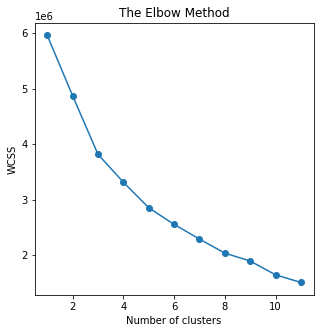

In [511]:
plt.figure(figsize=(5,5))
from sklearn.cluster import KMeans
wcss = []
K = range(1,12)
for i in K:
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=80, n_jobs=-1)
    kmeans.fit(retail_new_std)
    wcss.append(kmeans.inertia_)
plt.plot(K, wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [512]:
!pip install kneed

In [513]:
from kneed import KneeLocator
kn1 = KneeLocator(range(1,12), wcss, curve = 'convex', direction='decreasing')
print('Best k-value from Elbow curve: ',kn1.knee)

Best k-value from Elbow curve:  5


In [514]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 80, n_jobs=-1)
kmeans_pred = kmeans.fit_predict(retail_new_std)
retail_new_std['cluster_label'] = pd.DataFrame(kmeans_pred+1)

F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [515]:
retail_new_std['cluster_label'].value_counts()

2    239278
1    159203
4     89138
5     45001
3      9289
Name: cluster_label, dtype: int64

In [516]:
retail_duplicate['cluster label'] = pd.DataFrame(kmeans_pred+1)

In [517]:
retail_duplicate.head()

,Quantity,UnitPrice,Country,Cancellation,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day,cluster label
0,6,2.55,UK,No,48,Wednesday,December,Q3,Morning,2
1,6,3.39,UK,No,48,Wednesday,December,Q3,Morning,2
2,8,2.75,UK,No,48,Wednesday,December,Q3,Morning,2
3,6,3.39,UK,No,48,Wednesday,December,Q3,Morning,2
4,6,3.39,UK,No,48,Wednesday,December,Q3,Morning,2


In [518]:
retail_duplicate.to_csv("online retail with cluster labelling.csv")

In [519]:
# Cluster profiling

# Cluster 1  - Avg Qty=9.46
#              Avg Unit price - 3.71
#              Country - Only UK
#              Cancellation - No
#              Quarter - Q1 and Q2 (Summer season)
#              Days - All throughout week except for Saturday
#              Time of the day - Throughout

# Cluster 2  - Avg Qty=8.82
#              Avg Unit price - 3.74
#              Country - Only UK
#              Cancellation - No
#              Quarter - Q2 and Q3 (Winter season)
#              Days - All throughout week except for Saturday
#              Time of the day - Throughout
                
# Cluster 3  - Avg Qty=29.84
#              Avg Unit price - 49.84 (High price items)
#              Country - Both UK and Non UK
#              Cancellation - Majorly cancellation orders
#              Quarter - Throughout the year
#              Days - All throughout week except for Saturday
#              Time of the day - Throughout
                
# Cluster 4  - Avg Qty=8.47
#              Avg Unit price - 3.87
#              Country - Only UK
#              Cancellation - No
#              Quarter - Q4 only
#              Days - All throughout week except for Saturday
#              Time of the day - Throughout
                
# Cluster 5  - Avg Qty=24.05
#              Avg Unit price - 4.53
#              Country - Both UK and non UK
#              Cancellation - No
#              Quarter - Throughout the year
#              Days - All throughout week except for Saturday
#              Time of the day - Throughout except for evening

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

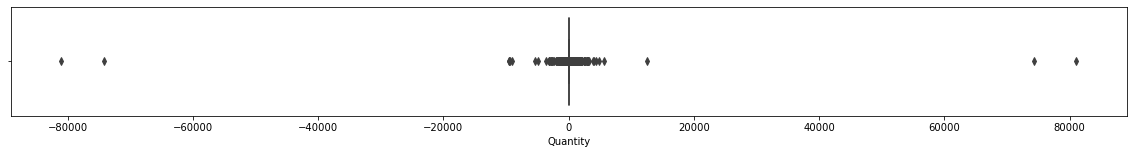

In [520]:
plt.figure(figsize=(20,2))
sns.boxplot(retail_new['Quantity'])

In [521]:
index = retail_new.loc[(retail_new.Quantity <-20000) | (retail_new.Quantity > 20000)].index

In [522]:
retail_new.drop(index, axis=0, inplace = True)

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

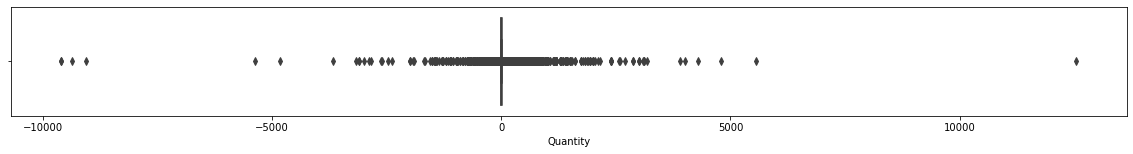

In [523]:
plt.figure(figsize=(20,2))
sns.boxplot(retail_new['Quantity'])

In [524]:
index1 = retail_new.loc[(retail_new.Quantity <-4000) | (retail_new.Quantity > 4000)].index

In [525]:
retail_new.drop(index1, axis=0, inplace = True)

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

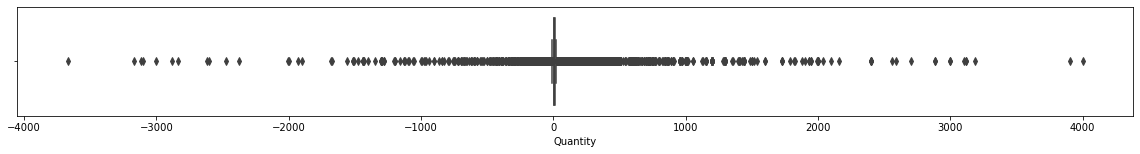

In [526]:
plt.figure(figsize=(20,2))
sns.boxplot(retail_new['Quantity'])

In [527]:
index2 = retail_new.loc[(retail_new.Quantity <-1000) | (retail_new.Quantity > 1000)].index
retail_new.drop(index2, axis=0, inplace = True)

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

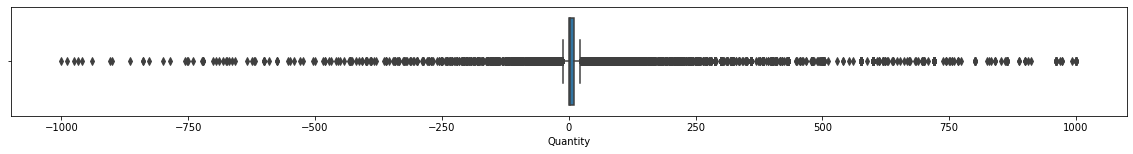

In [528]:
plt.figure(figsize=(20,2))
sns.boxplot(retail_new['Quantity'])

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

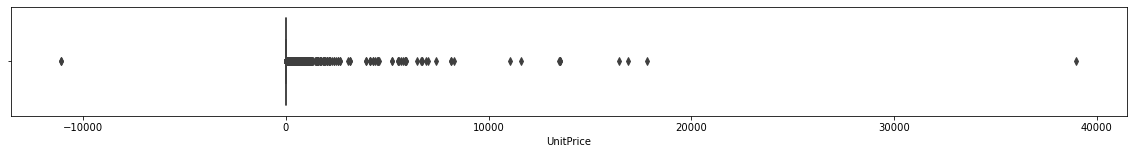

In [529]:
plt.figure(figsize=(20,2))
sns.boxplot(retail_new['UnitPrice'])

In [530]:
index3 = retail_new.loc[(retail_new.UnitPrice <0) | (retail_new.UnitPrice > 5000)].index
retail_new.drop(index3, axis=0, inplace = True)

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

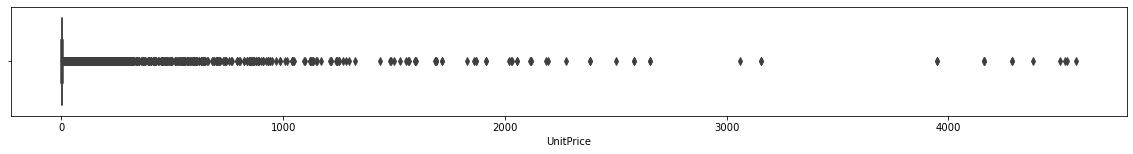

In [531]:
plt.figure(figsize=(20,2))
sns.boxplot(retail_new['UnitPrice'])

In [532]:
index4 = retail_new.loc[(retail_new.UnitPrice <0) | (retail_new.UnitPrice > 1500)].index
retail_new.drop(index4, axis=0, inplace = True)

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

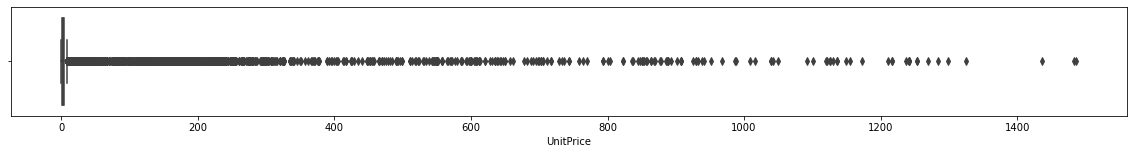

In [533]:
plt.figure(figsize=(20,2))
sns.boxplot(retail_new['UnitPrice'])

In [534]:
retail_new.shape

(541648, 11)

In [535]:
retail_new.head()

,Quantity,UnitPrice,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day,Country_Non UK,Country_UK,Cancellation_No,Cancellation_Yes
0,6,2.55,48,5,2,2,1,0,1,1,0
1,6,3.39,48,5,2,2,1,0,1,1,0
2,8,2.75,48,5,2,2,1,0,1,1,0
3,6,3.39,48,5,2,2,1,0,1,1,0
4,6,3.39,48,5,2,2,1,0,1,1,0


In [536]:
std_trans1 = std.fit_transform(retail_new)

In [537]:
retail_new_std1= pd.DataFrame(std_trans1, columns=retail_new.columns)

In [538]:
retail_new_std1.head()

,Quantity,UnitPrice,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day,Country_Non UK,Country_UK,Cancellation_No,Cancellation_Yes
0,-0.114074,-0.074584,1.14023,1.397172,-1.162176,0.430967,-0.888088,-0.306089,0.306089,0.131637,-0.131637
1,-0.114074,-0.026144,1.14023,1.397172,-1.162176,0.430967,-0.888088,-0.306089,0.306089,0.131637,-0.131637
2,-0.047359,-0.063051,1.14023,1.397172,-1.162176,0.430967,-0.888088,-0.306089,0.306089,0.131637,-0.131637
3,-0.114074,-0.026144,1.14023,1.397172,-1.162176,0.430967,-0.888088,-0.306089,0.306089,0.131637,-0.131637
4,-0.114074,-0.026144,1.14023,1.397172,-1.162176,0.430967,-0.888088,-0.306089,0.306089,0.131637,-0.131637


F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarnin

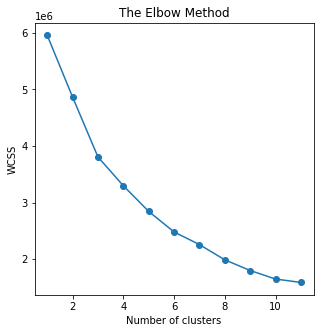

In [539]:
plt.figure(figsize=(5,5))
from sklearn.cluster import KMeans
wcss1 = []
K = range(1,12)
for i in K:
    kmeans1 = KMeans(n_clusters=i,init='k-means++', random_state=80, n_jobs=-1)
    kmeans1.fit(retail_new_std1)
    wcss1.append(kmeans1.inertia_)
plt.plot(K, wcss1,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [540]:
from kneed import KneeLocator
kn2 = KneeLocator(range(1,12), wcss1, curve = 'convex', direction='decreasing')
print('Best k-value from Elbow curve: ',kn2.knee)

Best k-value from Elbow curve:  5


In [541]:
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 80, n_jobs=-1)
kmeans_pred1 = kmeans1.fit_predict(retail_new_std1)
retail_new_std1['cluster_label'] = pd.DataFrame(kmeans_pred1+1)

F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [542]:
retail_new_std1['cluster_label'].value_counts()

2    239203
1    159138
4     89100
3     44981
5      9226
Name: cluster_label, dtype: int64

In [543]:
retail_duplicate1['cluster label_upd'] = pd.DataFrame(kmeans_pred1+1)

In [544]:
retail_duplicate1.head()

,Quantity,InvoiceDate,UnitPrice,Country,Cancellation,Week of the year,Day of the Week,Month of the year,Quarter of the year,Time of the day,cluster label_upd
0,6,2010-12-01 08:26:00,2.55,UK,No,48,Wednesday,December,Q3,Morning,2.0
1,6,2010-12-01 08:26:00,3.39,UK,No,48,Wednesday,December,Q3,Morning,2.0
2,8,2010-12-01 08:26:00,2.75,UK,No,48,Wednesday,December,Q3,Morning,2.0
3,6,2010-12-01 08:26:00,3.39,UK,No,48,Wednesday,December,Q3,Morning,2.0
4,6,2010-12-01 08:26:00,3.39,UK,No,48,Wednesday,December,Q3,Morning,2.0


In [545]:
retail_duplicate1.to_csv("online retail with cluster labelling_update.csv")